Task 3: Customer Segmentation / Clustering /EDA


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

from mpl_toolkits.mplot3d import Axes3D


In [13]:
# Load datasets
customers = pd.read_csv(r'C:\Users\ADMIN\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\ADMIN\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\ADMIN\Downloads\Transactions.csv')

In [117]:
# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [119]:
# Data Overview
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [121]:
# Data Cleaning
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [123]:
# Check for duplicate rows
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [125]:
# Data types of the columns
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [127]:
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [129]:
# EDA on Transactions Dataset
# Calculate total sales
transactions['TotalValue'] = transactions['Quantity'] * transactions['Price']
transactions['TotalValue'] 

0       300.68
1       300.68
2       300.68
3       601.36
4       902.04
        ...   
995     459.86
996    1379.58
997    1839.44
998     919.72
999     459.86
Name: TotalValue, Length: 1000, dtype: float64

In [131]:
# Merging data for a better overview
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

In [133]:
# Check the first few rows of the merged dataset
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [135]:
# Summary statistics for numerical columns
print(merged_data.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

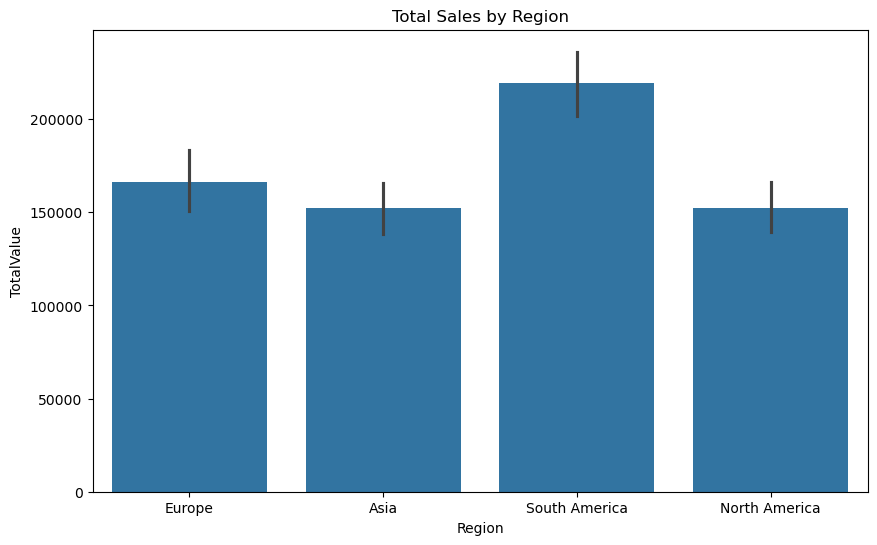

In [137]:
# Plot Sales by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='TotalValue', data=merged_data, estimator=np.sum)
plt.title('Total Sales by Region')
plt.show()

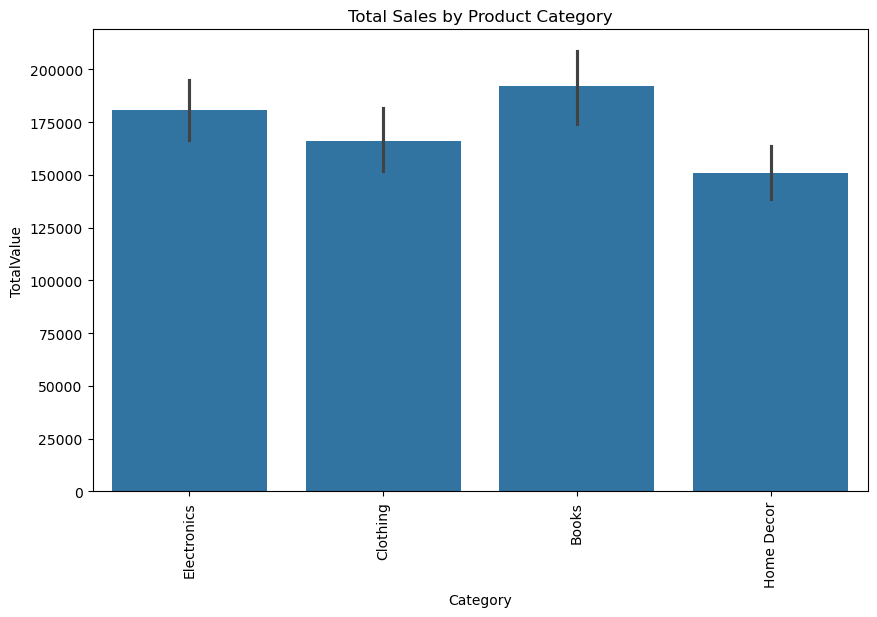

In [139]:
# Plot Sales by Product Category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='TotalValue', data=merged_data, estimator=np.sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=90)
plt.show()


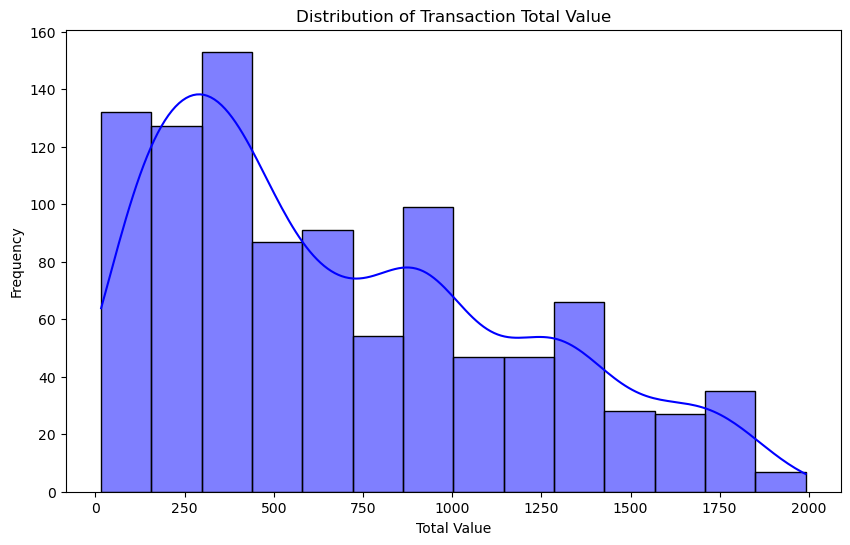

In [140]:
# Distribution of TotalValue
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], kde=True, color='blue')
plt.title('Distribution of Transaction Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

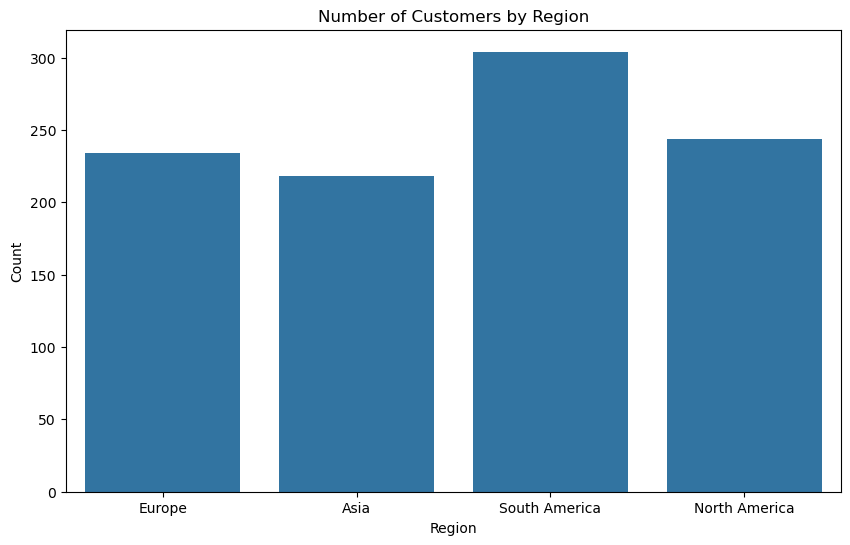

In [142]:
# Count of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=merged_data)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


Task 3: Customer Segmentation / Clustering _ MODEL

In [148]:
# Merge customer and transaction data
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

In [150]:
# Aggregate data by customer to get their total spend, frequency, and other features
customer_profile = customer_transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean'
}).reset_index()


In [152]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['Quantity', 'TotalValue', 'Price']])

In [154]:
# Compute similarity matrix
cosine_sim = cosine_similarity(scaled_data)

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [161]:
# Prepare features for clustering
clustering_data = customer_profile[['Quantity', 'TotalValue', 'Price']]

In [163]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

C:\Users\ADMIN\anaconda 4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [165]:
# Prepare features for clustering
clustering_data = customer_profile[['Quantity', 'TotalValue', 'Price']]


In [167]:
# Add cluster labels to the dataset
customer_profile['Cluster'] = clusters

In [169]:
# Evaluate the clustering using DB Index
db_index = davies_bouldin_score(clustering_data, clusters)
print(f"DB Index: {db_index}")


DB Index: 0.5375463097558143


Visualizing

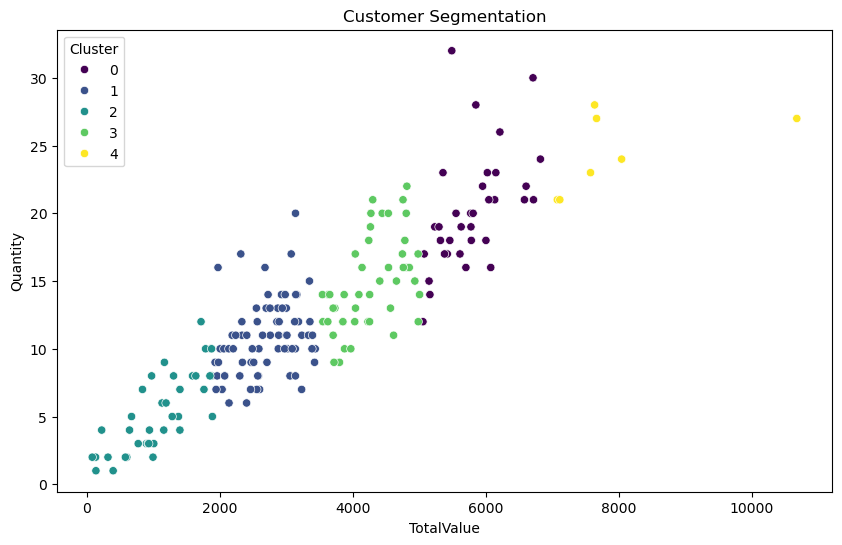

In [171]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_profile, palette='viridis')
plt.title('Customer Segmentation')
plt.show()


In [173]:
# Calculate the Silhouette Score (accuracy evaluation)
silhouette_avg = silhouette_score(clustering_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5220865329425065


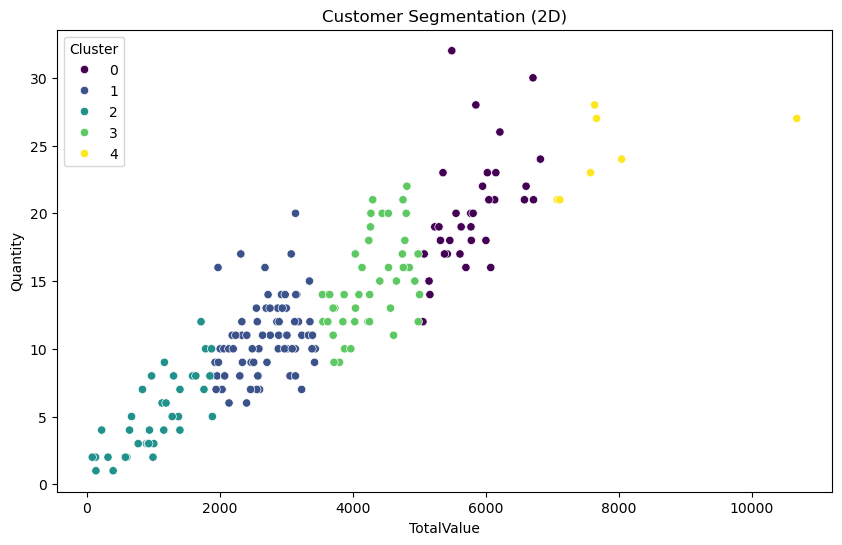

In [175]:
# Visualizing the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_profile, palette='viridis', marker='o')
plt.title('Customer Segmentation (2D)')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.legend(title='Cluster')


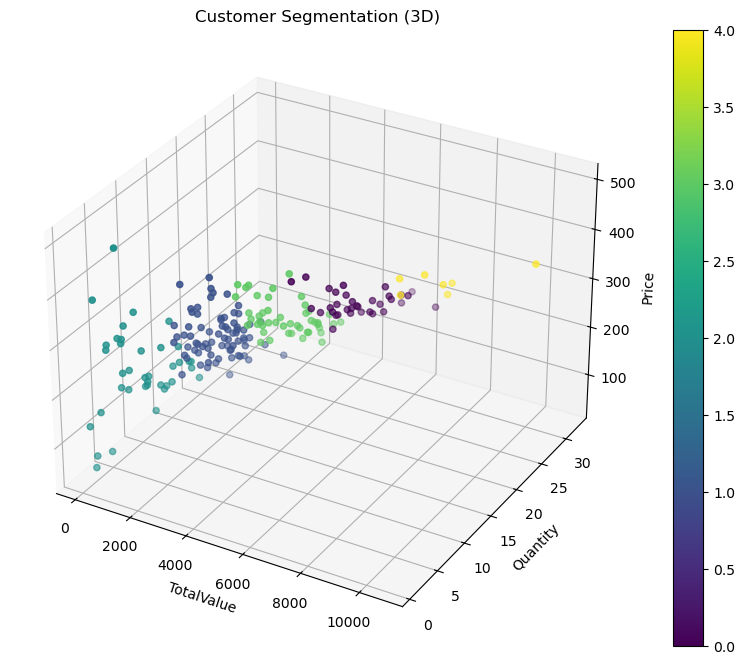

In [177]:
# Visualizing the clusters in 3D (using 'Quantity', 'TotalValue', 'Price')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(customer_profile['TotalValue'], customer_profile['Quantity'], customer_profile['Price'], c=customer_profile['Cluster'], cmap='viridis')
ax.set_xlabel('TotalValue')
ax.set_ylabel('Quantity')
ax.set_zlabel('Price')
plt.title('Customer Segmentation (3D)')
plt.colorbar(scatter)
plt.show()


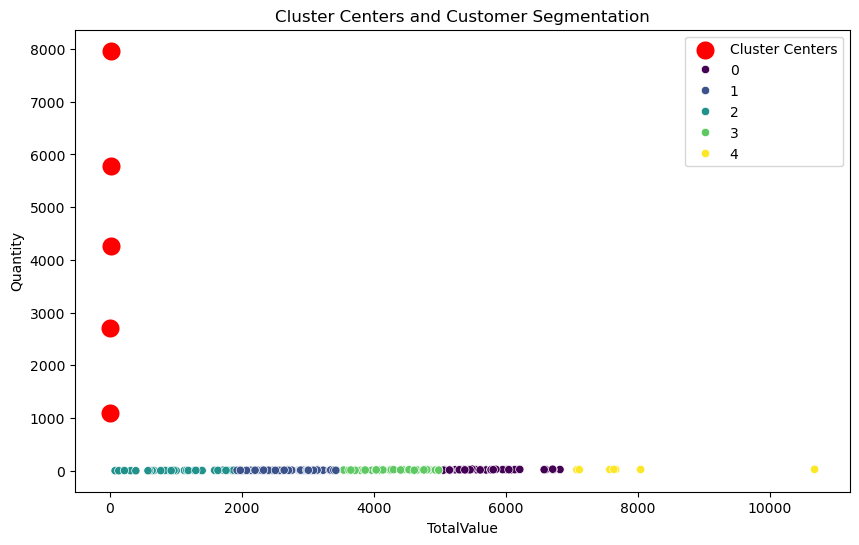

In [178]:
# Visualizing cluster centers
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=200, color='red', label='Cluster Centers')
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_profile, palette='viridis')
plt.title('Cluster Centers and Customer Segmentation')
plt.legend()
plt.show()


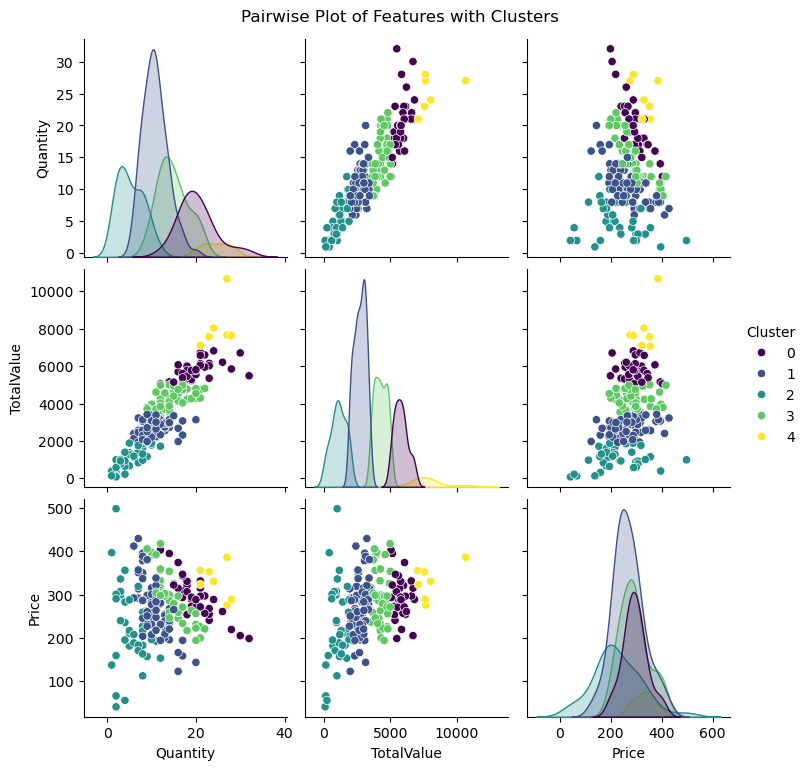

In [180]:
# Pairwise plot of features with clusters
sns.pairplot(customer_profile[['Quantity', 'TotalValue', 'Price', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Plot of Features with Clusters', y=1.02)
plt.show()